In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ============================================================================
# STEP 1: CREATE AND LOAD DATA
# ============================================================================

print("=" * 80)
print("STEP 1: DATA CREATION")
print("=" * 80)

n_samples = 1000

data = {
    'customer_id': range(1, n_samples + 1),
    'age': np.random.randint(18, 80, n_samples),
    'income': np.random.normal(50000, 20000, n_samples),
    'account_balance': np.random.normal(5000, 3000, n_samples),
    'tenure_months': np.random.randint(1, 120, n_samples),
    'num_products': np.random.randint(1, 5, n_samples),
    'credit_score': np.random.randint(300, 850, n_samples),
    'gender': np.random.choice(['Male', 'Female', 'Other'], n_samples),
    'location': np.random.choice(['Urban', 'Suburban', 'Rural'], n_samples),
    'customer_service_calls': np.random.randint(0, 10, n_samples),
    'churned': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
}

df = pd.DataFrame(data)

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nData Types:")
print(df.dtypes)



STEP 1: DATA CREATION
Dataset Shape: (1000, 11)

First 5 rows:
   customer_id  age        income  account_balance  tenure_months  \
0            1   28  18873.591078      4547.779119             95   
1            2   30  68085.463422      3494.275323             90   
2            3   39  86642.676711      4252.035343             66   
3            4   50  77699.427057      4523.619918             92   
4            5   26  53694.842337      4909.765323            103   

   num_products  credit_score  gender  location  customer_service_calls  \
0             3           686    Male  Suburban                       9   
1             2           331  Female     Urban                       0   
2             1           310  Female  Suburban                       3   
3             3           300  Female     Urban                       2   
4             1           823  Female     Urban                       7   

   churned  
0        0  
1        0  
2        0  
3        0  
4     

In [3]:
# ============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "=" * 80)
print("STEP 2: EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check data distribution
print("\nValue Counts for Categorical Variables:")
print("\nGender Distribution:")
print(df['gender'].value_counts())
print("\nLocation Distribution:")
print(df['location'].value_counts())



STEP 2: EXPLORATORY DATA ANALYSIS

Descriptive Statistics:
       customer_id          age         income  account_balance  \
count  1000.000000  1000.000000    1000.000000      1000.000000   
mean    500.500000    48.320000   50933.366849      4980.663064   
std     288.819436    18.163687   20233.730826      3101.129807   
min       1.000000    18.000000   -9283.202002     -4278.738427   
25%     250.750000    32.000000   37393.778647      2887.679949   
50%     500.500000    47.500000   51356.170702      5046.013977   
75%     750.250000    65.000000   64591.160576      6943.870581   
max    1000.000000    79.000000  123307.343612     17566.014982   

       tenure_months  num_products  credit_score  customer_service_calls  \
count    1000.000000   1000.000000   1000.000000             1000.000000   
mean       58.884000      2.485000    577.820000                4.556000   
std        34.470694      1.137132    156.792549                2.908147   
min         1.000000      1.0000

In [4]:
# ============================================================================
# STEP 3: DATA PREPROCESSING
# ============================================================================

print("\n" + "=" * 80)
print("STEP 3: DATA PREPROCESSING")
print("=" * 80)

# Create a copy for processing
df_processed = df.copy()

# Drop customer_id (not useful for prediction)
df_processed = df_processed.drop('customer_id', axis=1)

# Define target variable (what we want to predict)
# Let's predict account_balance based on other features
target = 'account_balance'

print(f"\nTarget Variable: {target}")

# Separate features and target
X = df_processed.drop(target, axis=1)
y = df_processed[target]

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")



STEP 3: DATA PREPROCESSING

Target Variable: account_balance

Features shape: (1000, 9)
Target shape: (1000,)

Categorical columns: ['gender', 'location']
Numerical columns: ['age', 'income', 'tenure_months', 'num_products', 'credit_score', 'customer_service_calls', 'churned']


In [5]:
# ============================================================================
# STEP 4: HANDLE CATEGORICAL VARIABLES (ENCODING)
# ============================================================================

print("\n" + "=" * 80)
print("STEP 4: ENCODING CATEGORICAL VARIABLES")
print("=" * 80)

# Method 1: Label Encoding for binary/ordinal variables
# Method 2: One-Hot Encoding for nominal variables

# One-Hot Encoding for gender and location
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"\nShape after encoding: {X_encoded.shape}")
print(f"\nNew columns after encoding:")
print(X_encoded.columns.tolist())
print(f"\nFirst few rows after encoding:")
print(X_encoded.head())



STEP 4: ENCODING CATEGORICAL VARIABLES

Shape after encoding: (1000, 11)

New columns after encoding:
['age', 'income', 'tenure_months', 'num_products', 'credit_score', 'customer_service_calls', 'churned', 'gender_Male', 'gender_Other', 'location_Suburban', 'location_Urban']

First few rows after encoding:
   age        income  tenure_months  num_products  credit_score  \
0   28  18873.591078             95             3           686   
1   30  68085.463422             90             2           331   
2   39  86642.676711             66             1           310   
3   50  77699.427057             92             3           300   
4   26  53694.842337            103             1           823   

   customer_service_calls  churned  gender_Male  gender_Other  \
0                       9        0         True         False   
1                       0        0        False         False   
2                       3        0        False         False   
3                       2   

In [6]:
# ============================================================================
# STEP 5: FEATURE SCALING
# ============================================================================

print("\n" + "=" * 80)
print("STEP 5: FEATURE SCALING")
print("=" * 80)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X_encoded)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

print("\nBefore Scaling (sample):")
print(X_encoded.head())
print("\nAfter Scaling (sample):")
print(X_scaled_df.head())

print("\nMean after scaling (should be ~0):")
print(X_scaled_df.mean())
print("\nStd after scaling (should be ~1):")
print(X_scaled_df.std())



STEP 5: FEATURE SCALING

Before Scaling (sample):
   age        income  tenure_months  num_products  credit_score  \
0   28  18873.591078             95             3           686   
1   30  68085.463422             90             2           331   
2   39  86642.676711             66             1           310   
3   50  77699.427057             92             3           300   
4   26  53694.842337            103             1           823   

   customer_service_calls  churned  gender_Male  gender_Other  \
0                       9        0         True         False   
1                       0        0        False         False   
2                       3        0        False         False   
3                       2        0        False         False   
4                       7        0        False         False   

   location_Suburban  location_Urban  
0               True           False  
1              False            True  
2               True           False  

In [8]:

# ============================================================================
# STEP 6: TRAIN-TEST SPLIT
# ============================================================================

print("\n" + "=" * 80)
print("STEP 6: TRAIN-TEST SPLIT")
print("=" * 80)

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set percentage: {X_train.shape[0]/len(X_scaled)*100:.1f}%")
print(f"Testing set percentage: {X_test.shape[0]/len(X_scaled)*100:.1f}%")



STEP 6: TRAIN-TEST SPLIT

Training set size: 800 samples
Testing set size: 200 samples
Training set percentage: 80.0%
Testing set percentage: 20.0%


In [9]:

# ============================================================================
# STEP 7: BUILD LINEAR REGRESSION MODEL
# ============================================================================

print("\n" + "=" * 80)
print("STEP 7: BUILDING LINEAR REGRESSION MODEL")
print("=" * 80)

# Initialize the model
model = LinearRegression()

# Train the model
print("\nTraining the model...")
model.fit(X_train, y_train)
print("✓ Model trained successfully!")

# Display model parameters
print(f"\nModel Intercept: {model.intercept_:.2f}")
print(f"\nModel Coefficients:")

# Create a DataFrame of feature importance
coefficients_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients_df)



STEP 7: BUILDING LINEAR REGRESSION MODEL

Training the model...
✓ Model trained successfully!

Model Intercept: 4896.74

Model Coefficients:
                   Feature  Coefficient
9        location_Suburban  -265.126846
10          location_Urban  -221.251906
7              gender_Male  -148.668868
4             credit_score   141.793156
0                      age   115.498727
5   customer_service_calls   -96.916194
3             num_products   -74.027522
8             gender_Other    34.219435
2            tenure_months   -32.725605
1                   income   -21.822582
6                  churned    -4.817154


In [10]:
# ============================================================================
# STEP 8: MAKE PREDICTIONS
# ============================================================================

print("\n" + "=" * 80)
print("STEP 8: MAKING PREDICTIONS")
print("=" * 80)

# Predictions on training set
y_train_pred = model.predict(X_train)

# Predictions on test set
y_test_pred = model.predict(X_test)

# Show sample predictions
print("\nSample Predictions vs Actual (Test Set):")
comparison_df = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Predicted': y_test_pred[:10],
    'Difference': y_test[:10].values - y_test_pred[:10]
})
print(comparison_df)



STEP 8: MAKING PREDICTIONS

Sample Predictions vs Actual (Test Set):
         Actual    Predicted   Difference
0   3360.774518  4285.798244  -925.023726
1   6304.229645  5256.802909  1047.426736
2   5544.048177  4030.797990  1513.250187
3  11298.213602  5107.533091  6190.680511
4   6270.761970  5061.678103  1209.083867
5   6164.819205  4575.564898  1589.254307
6   7628.115137  4335.423108  3292.692029
7  10511.825520  5437.967828  5073.857692
8   4511.927002  5220.423349  -708.496347
9   9807.812298  4343.287065  5464.525233


In [11]:
# ============================================================================
# STEP 9: MODEL EVALUATION
# ============================================================================

print("\n" + "=" * 80)
print("STEP 9: MODEL EVALUATION")
print("=" * 80)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calculate metrics for test set
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTRAINING SET PERFORMANCE:")
print(f"R² Score: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE: {train_mae:.2f}")

print("\nTEST SET PERFORMANCE:")
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")

# Interpretation
print("\n" + "-" * 80)
print("INTERPRETATION:")
print("-" * 80)
print(f"• R² Score: {test_r2:.4f} means the model explains {test_r2*100:.2f}% of variance")
print(f"• RMSE: ${test_rmse:.2f} is the average prediction error")
print(f"• MAE: ${test_mae:.2f} is the average absolute error")

# Check for overfitting
if train_r2 - test_r2 > 0.1:
    print("\n⚠ Warning: Possible overfitting detected!")
else:
    print("\n✓ Model shows good generalization!")



STEP 9: MODEL EVALUATION

TRAINING SET PERFORMANCE:
R² Score: 0.0145
RMSE: 3065.50
MAE: 2419.49

TEST SET PERFORMANCE:
R² Score: -0.0096
RMSE: 3141.59
MAE: 2492.13

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
• R² Score: -0.0096 means the model explains -0.96% of variance
• RMSE: $3141.59 is the average prediction error
• MAE: $2492.13 is the average absolute error

✓ Model shows good generalization!


In [12]:
# ============================================================================
# STEP 10: CROSS-VALIDATION
# ============================================================================

print("\n" + "=" * 80)
print("STEP 10: CROSS-VALIDATION")
print("=" * 80)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, 
                            scoring='r2')

print(f"\nCross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {cv_scores.mean():.4f}")
print(f"Std CV R² Score: {cv_scores.std():.4f}")



STEP 10: CROSS-VALIDATION

Cross-Validation R² Scores: [-0.00326601 -0.05395271 -0.0213983   0.00114231 -0.03557061]
Mean CV R² Score: -0.0226
Std CV R² Score: 0.0204


In [13]:
# ============================================================================
# STEP 11: RESIDUAL ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("STEP 11: RESIDUAL ANALYSIS")
print("=" * 80)

# Calculate residuals
residuals = y_test - y_test_pred

print("\nResidual Statistics:")
print(f"Mean of Residuals: {residuals.mean():.4f} (should be ~0)")
print(f"Std of Residuals: {residuals.std():.2f}")
print(f"Min Residual: {residuals.min():.2f}")
print(f"Max Residual: {residuals.max():.2f}")



STEP 11: RESIDUAL ANALYSIS

Residual Statistics:
Mean of Residuals: 419.5921 (should be ~0)
Std of Residuals: 3121.26
Min Residual: -7924.92
Max Residual: 9196.78



STEP 12: CREATING VISUALIZATIONS


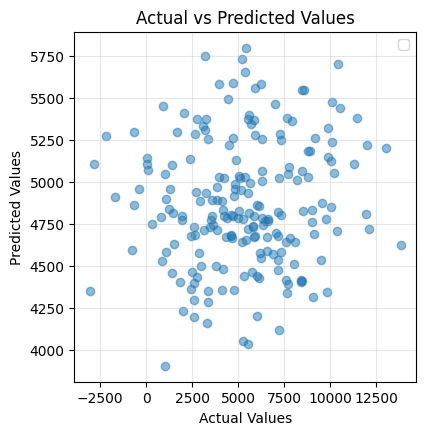

In [ ]:
# ============================================================================
# STEP 12: VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 80)
print("STEP 12: CREATING VISUALIZATIONS")
print("=" * 80)

plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)


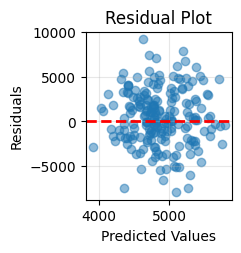

In [32]:
# Plot 2: Residual Plot
plt.subplot(2, 3, 2)
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

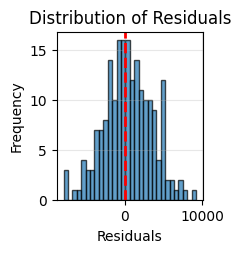

In [18]:
# Plot 3: Residual Distribution
plt.subplot(2, 3, 3)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3)

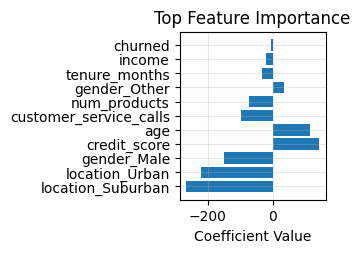

In [23]:
# Plot 4: Feature Importance
plt.subplot(2, 3, 4)
top_features = coefficients_df
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Top Feature Importance')
plt.grid(True, alpha=0.3)

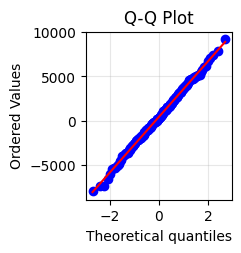

In [24]:
# Plot 5: Q-Q Plot (for normality of residuals)
plt.subplot(2, 3, 5)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.grid(True, alpha=0.3)


✓ Visualizations saved as 'linear_regression_analysis.png'


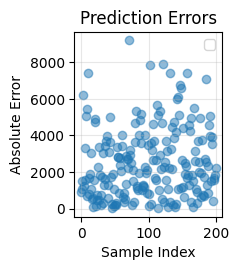

In [35]:
# Plot 6: Prediction Error
plt.subplot(2, 3, 6)
errors = np.abs(residuals)
plt.scatter(range(len(errors)), errors, alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Absolute Error')
plt.title('Prediction Errors')
# plt.axhline(y=errors.mean(), color='r', linestyle='--', 
#             label=f'Mean Error: {errors.mean():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('linear_regression_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualizations saved as 'linear_regression_analysis.png'")

In [26]:
# ---------------------------------------------------------------------------
# ASSUMPTION 1: LINEARITY
# ---------------------------------------------------------------------------
print("\n" + "-" * 80)
print("ASSUMPTION 1: LINEARITY")
print("-" * 80)
print("Testing if there's a linear relationship between features and target...")

# Pearson correlation between predictions and actual values
from scipy.stats import pearsonr

corr, p_value = pearsonr(y_test, y_test_pred)
print(f"\nCorrelation between actual and predicted: {corr:.4f}")
print(f"P-value: {p_value:.4e}")

if corr > 0.7:
    print("✓ PASS: Strong linear relationship detected")
elif corr > 0.5:
    print("⚠ WARNING: Moderate linear relationship")
else:
    print("✗ FAIL: Weak linear relationship - Linear Regression may not be appropriate")




--------------------------------------------------------------------------------
ASSUMPTION 1: LINEARITY
--------------------------------------------------------------------------------
Testing if there's a linear relationship between features and target...

Correlation between actual and predicted: 0.0954
P-value: 1.7921e-01
✗ FAIL: Weak linear relationship - Linear Regression may not be appropriate


NameError: name 'vif_data' is not defined

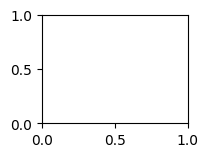

In [33]:
# Plot 7: VIF Bar Chart
plt.subplot(3, 3, 7)
top_vif = vif_data.head(10)
plt.barh(range(len(top_vif)), top_vif['VIF'])
plt.yticks(range(len(top_vif)), top_vif['Feature'])
plt.xlabel('VIF Value')
plt.title('Multicollinearity: VIF Values')
plt.axvline(x=10, color='r', linestyle='--', label='Threshold (10)')
plt.legend()
plt.grid(True, alpha=0.3)

In [31]:
# ---------------------------------------------------------------------------
# ASSUMPTION 3: HOMOSCEDASTICITY (Constant Variance)
# ---------------------------------------------------------------------------
print("\n" + "-" * 80)
print("ASSUMPTION 3: HOMOSCEDASTICITY")
print("-" * 80)
print("Testing if variance of residuals is constant...")

# Breusch-Pagan test for heteroscedasticity
from scipy import stats

# Simple visual test: correlation between absolute residuals and predictions
abs_residuals = np.abs(residuals)
corr_hetero, p_hetero = pearsonr(y_test_pred, abs_residuals)

print(f"\nCorrelation between predictions and absolute residuals: {corr_hetero:.4f}")
print(f"P-value: {p_hetero:.4f}")

if p_hetero > 0.05:
    print("✓ PASS: Homoscedasticity assumption met (p > 0.05)")
else:
    print("⚠ WARNING: Heteroscedasticity detected (p < 0.05)")
    print("   Consider: log transformation, weighted regression, or robust standard errors")

# Visual test: spread of residuals
residual_spread = residuals.std()
print(f"\nStandard deviation of residuals: {residual_spread:.2f}")



--------------------------------------------------------------------------------
ASSUMPTION 3: HOMOSCEDASTICITY
--------------------------------------------------------------------------------
Testing if variance of residuals is constant...

Correlation between predictions and absolute residuals: 0.0463
P-value: 0.5153
✓ PASS: Homoscedasticity assumption met (p > 0.05)

Standard deviation of residuals: 3121.26
